## Data Visualization on Kaggle's Titanic: Machine Learning from Disaster train dataset

In this notebook, the open dataset with data on the passengers aboard the Titanic has been looked at. Data cleaning and transformation has been applied and attributes were engineered to create new ones to better analyze data. 

The main purpose of this notebook is to understand what categories of passengers were most likely to survive the Titanic disaster. 

In [1]:
# reading te dataset into a pandas dataframe
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


data_train = pd.read_csv('train.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
data_train.isnull().any() # --> Age, Cabin, and Embarked have null values

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [3]:
data_train.describe() # --> The mean value of the survival column (since survival is boolean distribution) shows 38% rate of survival

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the first look into the dataset we understand that the __Age__, __Cabin__, and __Embarked__ have null values. Also, the mean value of the __Survived__ column which is a boolean distribution shows 38% rate of survival. 

Next new data are engineered from the sex of passengers and their age, children (under 16 years old) are separetd from female and male adults. 

Passengers are also divided into 7 groups based on their ages: A, B, C, D, E, F, and R which is introduced as attribute __Age_Group__. (A: under 16 -- B: 16 to 24 -- C: 24 to 29.5 -- D: 29.5 to 31 -- E: 31 to 40 -- F: above 40)

Also passengers ticket class along with the gender of the passenger also have been used to create a new attribute called __class_sex__. A new attribute is also formed with ticket class, gender, and age of the passenger named __class_gender_age__.


An attribute named __family_stat__ is also created that determines whether the passenger was alone or was with a sibling or a spouse. The attribte "SibSp" has been used to create this. 



Below different functions are introduced and then applied to the datafram to transform and engineer data to be able to better analyze the survival of Titanic passengers.



using seaborn's catplot different factors are analyzed on the survival rate.the type of plot is considered "bar" so that the percentage is compared between groups

In [4]:

def find_child(data_Parch):   ##to distinguish the child from the female and male
    age, sex, Parch = data_Parch
    person = sex[0].upper()
    if (age< 16):
        person = "Ch"
    else:
        person = sex[0].upper()

    return person

def class_sex_age(data_class):   #To combine data from different ticket classes, different genders, as well as different age groups
    pclass, person, age = data_class
    if (person== 'child'):
        class_gender = str('child '+ str(age) + '_'+str(pclass))
    else:
        class_gender = str(str(person)+ str(age)+ '_'+str(pclass))
    if (person=='F' and age=='A'):
        print ('bigh')
    return class_gender


def sex_age (data_sex_age):    ##combining data from gender and age group
    sex, age_group = data_sex_age
    sex_age = str(sex)+'_'+str(age_group)
    return sex_age



def class_sex (data_class):  ##combining data from ticket class and child or female and male
    pclass, person = data_class
    class_sex = str(person)+ '_'+ str(pclass)

    return class_sex


def age_group (data_age):   ##Grouping the age -- with function numbers(data_age) it has been tested to see the groups have almost close number of people in it
    age = float(data_age)
    #print (float(age))
    age_group = 0
    if (age <16):
        age_group="A"  #A is the child group
    elif (age < 24 and age>=16):
        age_group = 'B' #' B: 16 to under 24 years old'
    elif (age>=24 and age<29.5):
        age_group = 'C' # C:  24 to 29.5 years old'
    elif (age>=29.5 and age<31):
        age_group = 'D' # D: 29.5 to 31 years old'
    elif(age >=31 and age<40 ):
        age_group = 'E' # E: 31 to 40 years old'
    elif (age >=40 and age <130):
        age_group = 'F' # F: older than 40
    else:
        age_group ="R" #to make sure there are no NAN
        #print (age)
    return age_group


def sibspouse (data_sibsp):
    family = float(data_sibsp)
    if (family == 0):
        stat = '0'
    elif (family>=1 and family<=3):
        stat ="1-3"
    else:
        stat =">3"
    return stat



After introducing the functions required to engineer new attributes, data has been cleaned and the null values are taken care of. For example on the Age column, the null values are filled in with the mean of the Ages of the passengers introduced in this dataset. 

The attribute __parent_child__ is introduced that determines whether a passenger was a child or a female or a male. 
The age data is grouped and the ticket class, gender of the passenger, and the age group are then used to create an attributed callsed __class_gender_age__. 

In [5]:
import pandas as pd
df = pd.DataFrame(data_train['Survived'])
df['Sex']=pd.DataFrame(data_train['Sex'].replace(['female', 'male'], ['F','M']))
df['Pclass'] = pd.DataFrame(data_train['Pclass'])
# finding out the children
df['parent-child'] = pd.DataFrame(data_train[['Age', 'Sex', 'Parch']].apply(find_child, axis=1))

df['Age']= pd.DataFrame(data_train['Age'])

#### filling NA with mean of the data Age. and saving it on to the df after applying the age group function to it.
df['Age_Group'] = pd.DataFrame(df['Age'].fillna(df['Age'].mean())).apply(age_group, axis=1)
#print(df['Age_Group'][5])
df['class_gender_age'] = pd.DataFrame(df[['Pclass', 'parent-child', 'Age_Group']]).apply(class_sex_age, axis =1)


df['class_sex'] = pd.DataFrame(df[['Pclass', 'parent-child']]).apply(class_sex, axis=1)

df['sex_age']=pd.DataFrame(df[['parent-child', 'Age_Group']]).apply(sex_age, axis=1)
df['SibSp'] = pd.DataFrame(data_train['SibSp'])
df['family_stat'] = pd.DataFrame(df[['SibSp']]).apply(sibspouse, axis=1)


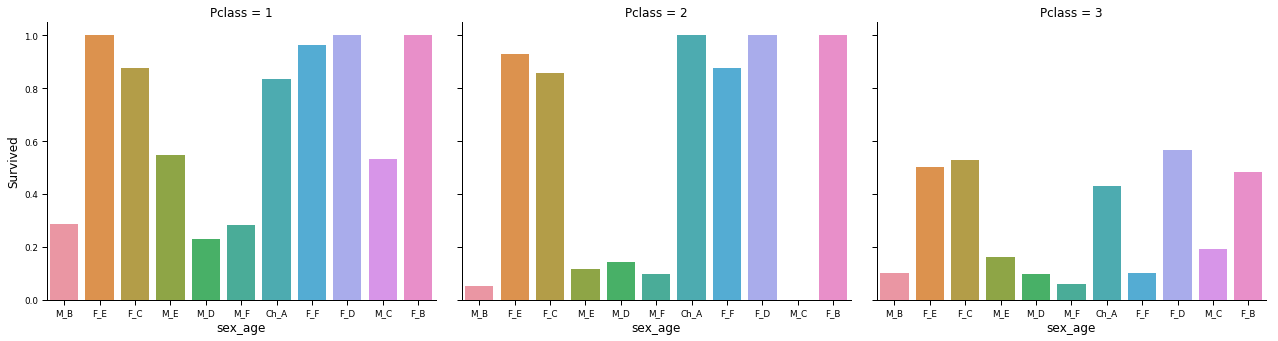

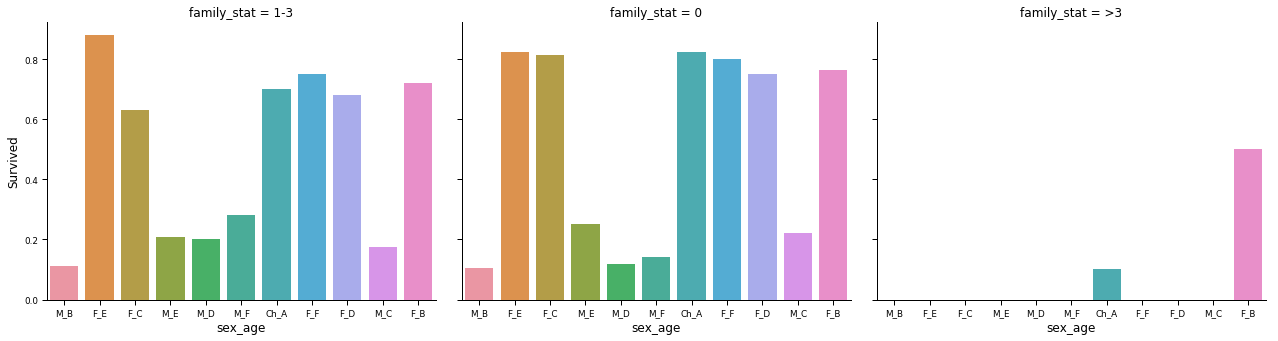

In [6]:
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":12})

sns.catplot(x='sex_age', y='Survived', col='Pclass', data=df, kind='bar', ci=None, aspect=1.2)
sns.catplot(x='sex_age', y='Survived', col='family_stat', data=df, kind='bar', ci=None, aspect=1.2)

plt.show()

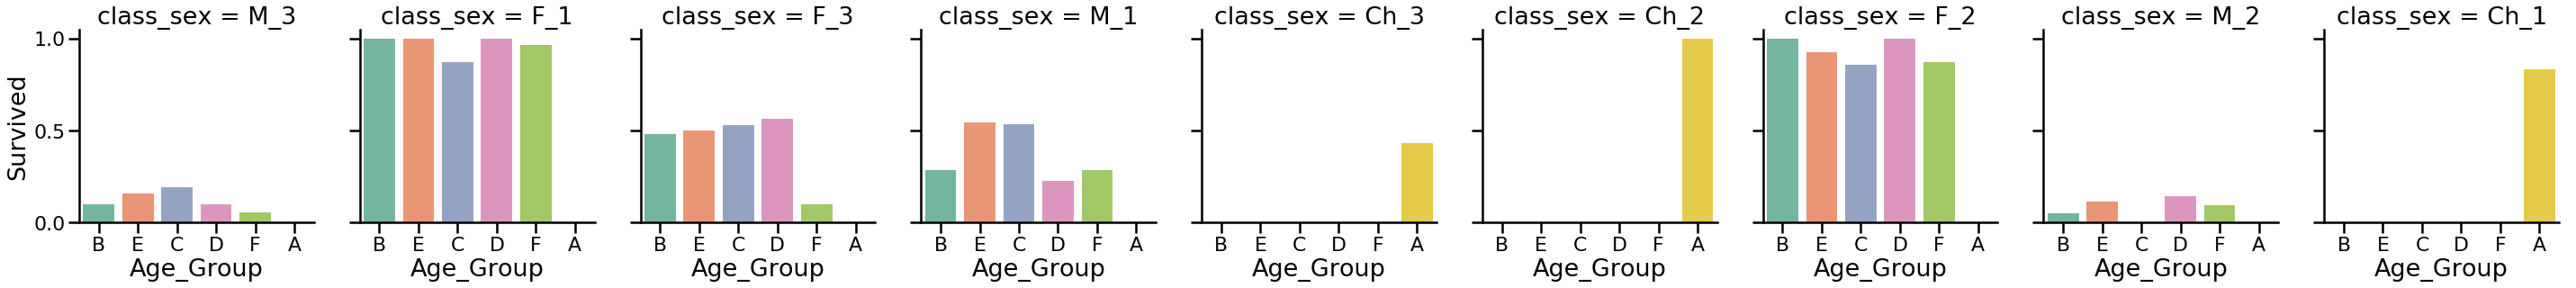

In [7]:
sns.set_context("poster", rc={"font.size":25,"axes.titlesize":30,"axes.labelsize":27})

sns.catplot(x='Age_Group', y="Survived", col="class_sex", data= df, kind="bar", ci=None, aspect=0.9, palette="Set2")

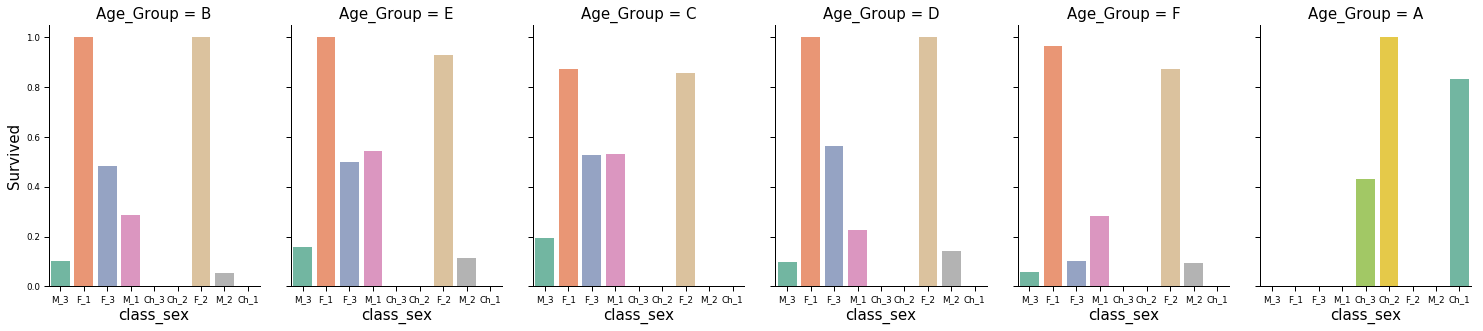

In [8]:
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":15})

sns.catplot(x='class_sex', y="Survived", col = 'Age_Group', data=df, kind="bar", ci=None, aspect=0.7, palette= "Set2")


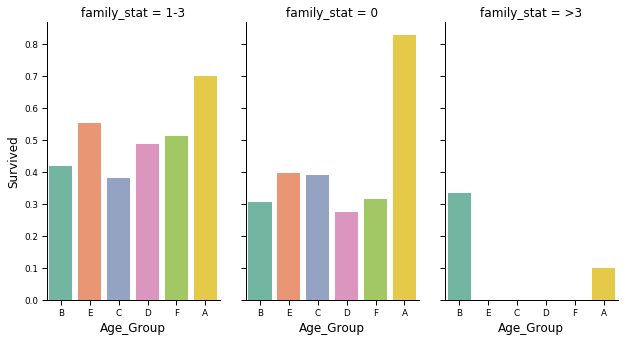

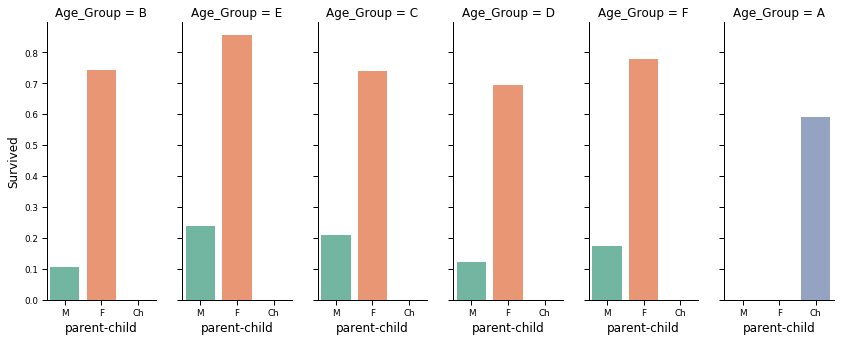

In [9]:
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":12})

sns.catplot(x='Age_Group', y="Survived", col = 'family_stat', data=df, kind="bar", ci=None, aspect=0.6, palette="Set2")
sns.catplot(x='parent-child', y="Survived", col= "Age_Group", data=df, kind="bar", ci=None, aspect = 0.4, palette="Set2")

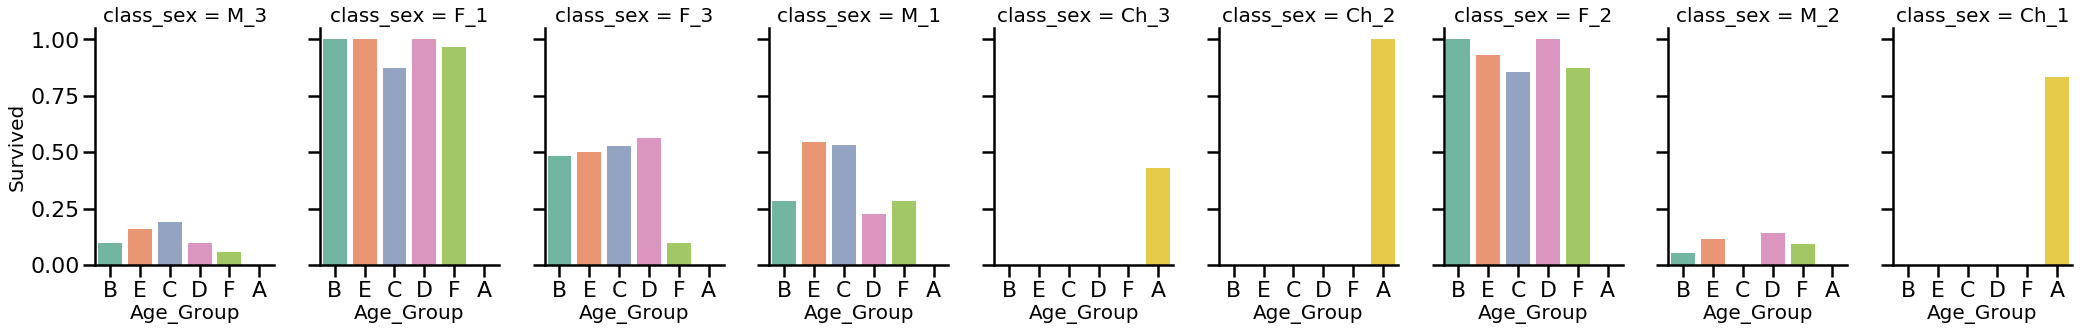

In [10]:
sns.set_context("poster", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

sns.catplot(x='Age_Group', y="Survived", col="class_sex", data= df, kind="bar", ci=None, height=5, aspect=0.65, palette="Set2")


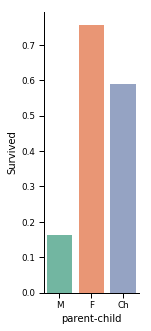

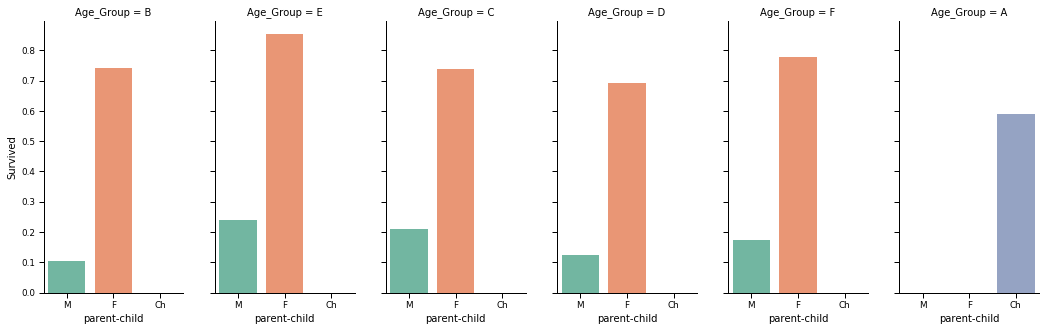

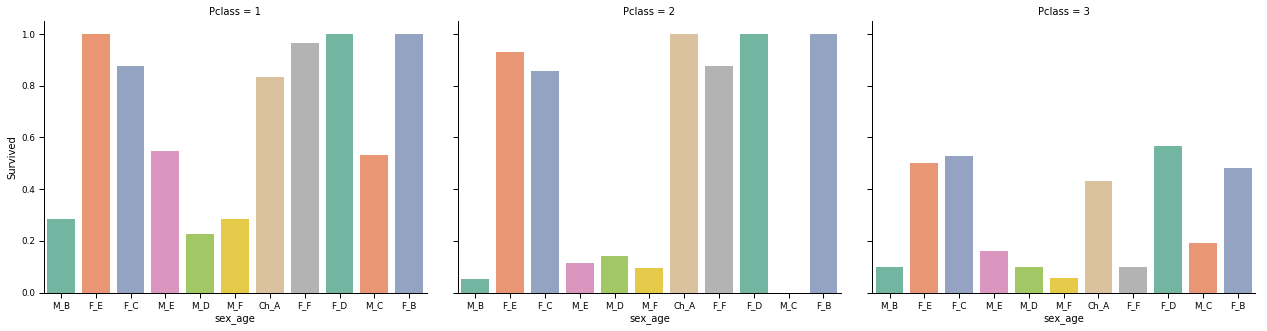

In [11]:
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":10})

sns.catplot(x='parent-child', y='Survived', data=df, kind="bar", ci=None, aspect=0.5, palette="Set2")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":10})


sns.catplot(x='parent-child', y='Survived', col="Age_Group", data=df, kind= "bar", ci=None, aspect=0.5, palette="Set2")

sns.catplot(x='sex_age', y="Survived", col="Pclass", data= df, kind="bar", ci=None, aspect=1.2, palette="Set2")

Seaborn's catplot has been used to analyze the effect of different factors in the survival rate. The type of plot is considered "bar" so that the percentage is compared between groups.

we can say more specificaly females in age group E had higher rate of survival (Group E: 31 to 40 years old).

We can also more specifically base on the plot of Pclass over the sex_age (the last one here) say that females in class 1, group age of B, D, E and insns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":10})

Class 2, group age of D and B along with children in class 2 have more specifically higher survival rate.

Looking at different plots, it could be concluded that the ticket class had an effect on the survival rate of the passengers. For example class 3 has much less survival rate. This is kind of expected as you expect that there are more service provided to higher class tickets and cabins. 

#### Conclusion:

based on the presented plots and data visualizations, it could be concluded that females in class 1 and 2 along with children in class 1 and 2 have higher survival rate this could be because of the policy that required females and children to be rescued first other than this, other groups could be specified as well.



we can say more specificaly females in age group E had higher rate of survival (Group E: 31 to 40 years old).

We can also more specifically base on the plot of Pclass over the sex_age (the last one here) say that females in class 1, group age of B, D, E and in class 2, group age of D and B along with children in class 2 have more specifically higher survival rate.
